In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def nearestneighborAccuracy(data, features):
    #https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/
    features = data[features].to_numpy()
    labels = data[0].to_numpy()
    rows = len(data)

    # print(features[0])
    correctClassified = 0
    for i in range(rows):
        # print("Classifying row", i)
        objToClass = features[i]
        objLabels = labels[i]

        #https://numpy.org/doc/2.1/reference/generated/numpy.linalg.norm.html
        distances = np.linalg.norm(features - objToClass, axis = 1)
        distances[i] = np.inf

        #https://stackoverflow.com/questions/2474015/getting-the-index-of-the-returned-max-or-min-item-using-max-min-on-a-list
        nearestNeighborIndex = np.argmin(distances)
        # print("   Nearest Neighbor is row", nearestNeighborIndex)
        if labels[i] == labels[nearestNeighborIndex]:
            correctClassified += 1

    # print("Correctly Classified", correctClassified)
    # print("Accuracy =", correctClassified/rows)
    return correctClassified/rows

In [4]:
def forwardSelection(data, features):
    # Start with an empty set of features
    currentSelection = []
    accuracies = []
    # unselectedFeatures = features
    unselectedFeatures = list(features)

    # Add one feature at a time to current set of features
    # All features will be added once
    for i in range(len(features)):
        iterAccuracies = []
        iterFeatures = []

        # Try adding one feature at a time to current sent of features
        for feature in unselectedFeatures:
            featuresToTest = currentSelection + [feature]
            accuracy = nearestneighborAccuracy(data, featuresToTest)
            iterAccuracies.append(accuracy)
            iterFeatures.append(feature)

        # Pick the added feature that has the highest accuracy
        maxAccIndex = np.argmax(iterAccuracies)
        maxFeature = iterFeatures[maxAccIndex]
        accuracies.append(iterAccuracies[maxAccIndex])

        # Add highest accuracy feature of current iteration to current set of features
        currentSelection.append(maxFeature)
        # unselectedFeatures.delete(maxFeature)
        unselectedFeatures.remove(maxFeature)

        print("Highest accuracy is", iterAccuracies[maxAccIndex])
        print("   Obtained by adding", maxFeature)
        print("   Our current selection is now", currentSelection)

    return currentSelection, accuracies

In [139]:
def backwardSelection(data, features):
    # Start with all of the features
    currentSelection = list(features)
    accuracies = []
    # unselectedFeatures = features
    unselectedFeatures = list(features)

    removeOrder = []

    # Renive one feature at a time to current set of features
    # All features will be removed once
    accuracies.append(nearestneighborAccuracy(data, currentSelection))
    for i in range(len(features)):
        iterAccuracies = []
        iterFeatures = []

        # Try removing one feature at a time to current sent of features
        for feature in unselectedFeatures:
            # print(feature)
            featuresToTest = currentSelection.copy()
            featuresToTest.remove(feature)
            # print(featuresToTest)
            accuracy = nearestneighborAccuracy(data, featuresToTest)
            iterAccuracies.append(accuracy)
            iterFeatures.append(feature)

        # Pick the added feature that has the highest accuracy
        maxAccIndex = np.argmax(iterAccuracies)
        maxFeature = iterFeatures[maxAccIndex]
        accuracies.append(iterAccuracies[maxAccIndex])

        # Add highest accuracy feature of current iteration to current set of features
        currentSelection.remove(maxFeature)
        # unselectedFeatures.delete(maxFeature)
        removeOrder.append(maxFeature)
        unselectedFeatures.remove(maxFeature)

        print("Highest accuracy is", iterAccuracies[maxAccIndex])
        print("   Obtained by removing", maxFeature)
        print("   Our current selection is now", currentSelection)

    return currentSelection, accuracies, removeOrder

In [6]:
dfLarge = pd.read_fwf("CS205_large_Data__45.txt", header=None)

In [7]:
dfSmall = pd.read_fwf("CS205_small_Data__22.txt", header=None)

In [90]:
numOfOnes = (dfLarge[0] == 2.0).sum()

In [87]:
nearestneighborAccuracy(dfLarge,[]) #baseline accuracy

0.813

In [94]:
nearestneighborAccuracy(dfSmall,[]) #baseline accuracy

0.824

In [183]:
currentSelectionLF, accuraciesLF = forwardSelection(dfLarge, dfLarge.columns[1:])
currentSelectionLB, accuraciesLB, removeOrderLB = backwardSelection(dfLarge, dfLarge.columns[1:])

Highest accuracy is 0.843
   Obtained by adding 4
   Our current selection is now [4]
Highest accuracy is 0.958
   Obtained by adding 39
   Our current selection is now [4, 39]
Highest accuracy is 0.949
   Obtained by adding 28
   Our current selection is now [4, 39, 28]
Highest accuracy is 0.918
   Obtained by adding 43
   Our current selection is now [4, 39, 28, 43]
Highest accuracy is 0.892
   Obtained by adding 21
   Our current selection is now [4, 39, 28, 43, 21]
Highest accuracy is 0.877
   Obtained by adding 40
   Our current selection is now [4, 39, 28, 43, 21, 40]
Highest accuracy is 0.855
   Obtained by adding 44
   Our current selection is now [4, 39, 28, 43, 21, 40, 44]
Highest accuracy is 0.831
   Obtained by adding 30
   Our current selection is now [4, 39, 28, 43, 21, 40, 44, 30]
Highest accuracy is 0.828
   Obtained by adding 41
   Our current selection is now [4, 39, 28, 43, 21, 40, 44, 30, 41]
Highest accuracy is 0.822
   Obtained by adding 15
   Our current selectio

In [175]:
currentSelectionSF, accuraciesSF = forwardSelection(dfSmall, dfSmall.columns[1:])
currentSelectionSB, accuraciesSB, removeOrderSB = backwardSelection(dfSmall, dfSmall.columns[1:])

Highest accuracy is 0.842
   Obtained by adding 2
   Our current selection is now [2]
Highest accuracy is 0.97
   Obtained by adding 8
   Our current selection is now [2, 8]
Highest accuracy is 0.944
   Obtained by adding 6
   Our current selection is now [2, 8, 6]
Highest accuracy is 0.938
   Obtained by adding 4
   Our current selection is now [2, 8, 6, 4]
Highest accuracy is 0.896
   Obtained by adding 3
   Our current selection is now [2, 8, 6, 4, 3]
Highest accuracy is 0.87
   Obtained by adding 9
   Our current selection is now [2, 8, 6, 4, 3, 9]
Highest accuracy is 0.852
   Obtained by adding 1
   Our current selection is now [2, 8, 6, 4, 3, 9, 1]
Highest accuracy is 0.838
   Obtained by adding 7
   Our current selection is now [2, 8, 6, 4, 3, 9, 1, 7]
Highest accuracy is 0.804
   Obtained by adding 10
   Our current selection is now [2, 8, 6, 4, 3, 9, 1, 7, 10]
Highest accuracy is 0.778
   Obtained by adding 12
   Our current selection is now [2, 8, 6, 4, 3, 9, 1, 7, 10, 12]
Hi

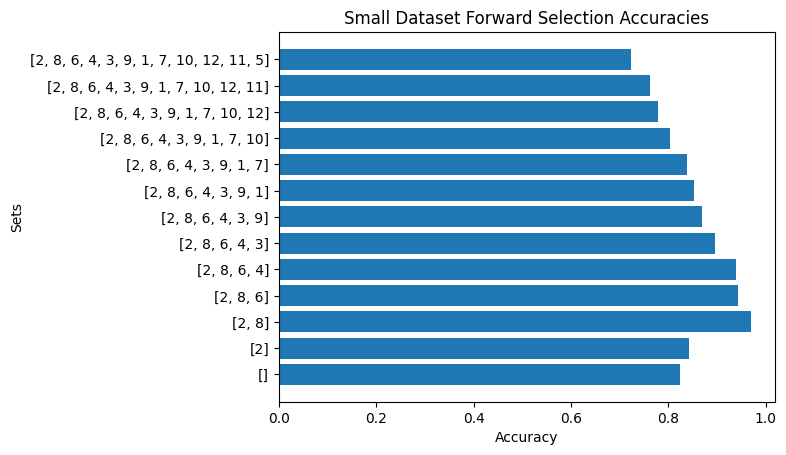

In [142]:
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
sets = ['[]']
prev = []
for feature in currentSelectionSF:
  prev.append(feature)
  sets.append(str(prev))

plt.barh(sets, [0.824] + accuraciesSF)
plt.title('Small Dataset Forward Selection Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Sets')
plt.show()

In [165]:
print(removeOrderSB)

[3, 5, 11, 6, 10, 12, 4, 7, 1, 9, 8, 2]


In [176]:
print(accuraciesSF)

[0.842, 0.97, 0.944, 0.938, 0.896, 0.87, 0.852, 0.838, 0.804, 0.778, 0.762, 0.724]


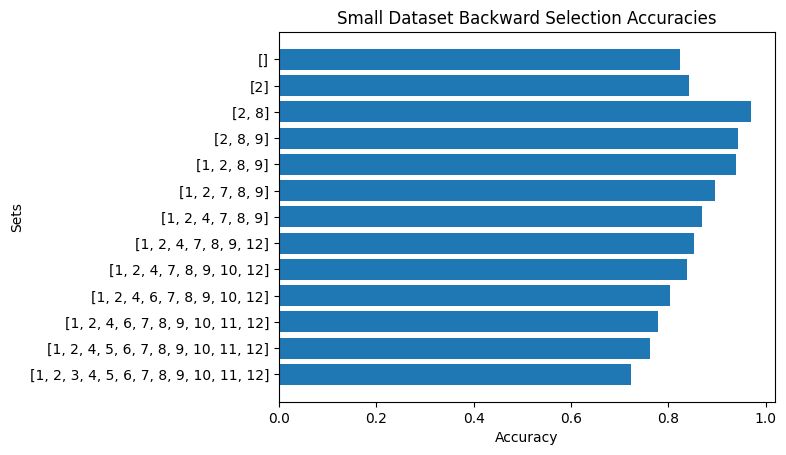

In [177]:
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
sets = []
prev = list(dfSmall.columns[1:])
sets.append(str(prev))
for feature in removeOrderSB:
  prev.remove(feature)
  sets.append(str(prev))

accuraciesSF = [0.824] + accuraciesSF
accuraciesSF.reverse()
plt.barh(sets, accuraciesSF)
plt.title('Small Dataset Backward Selection Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Sets')
plt.show()

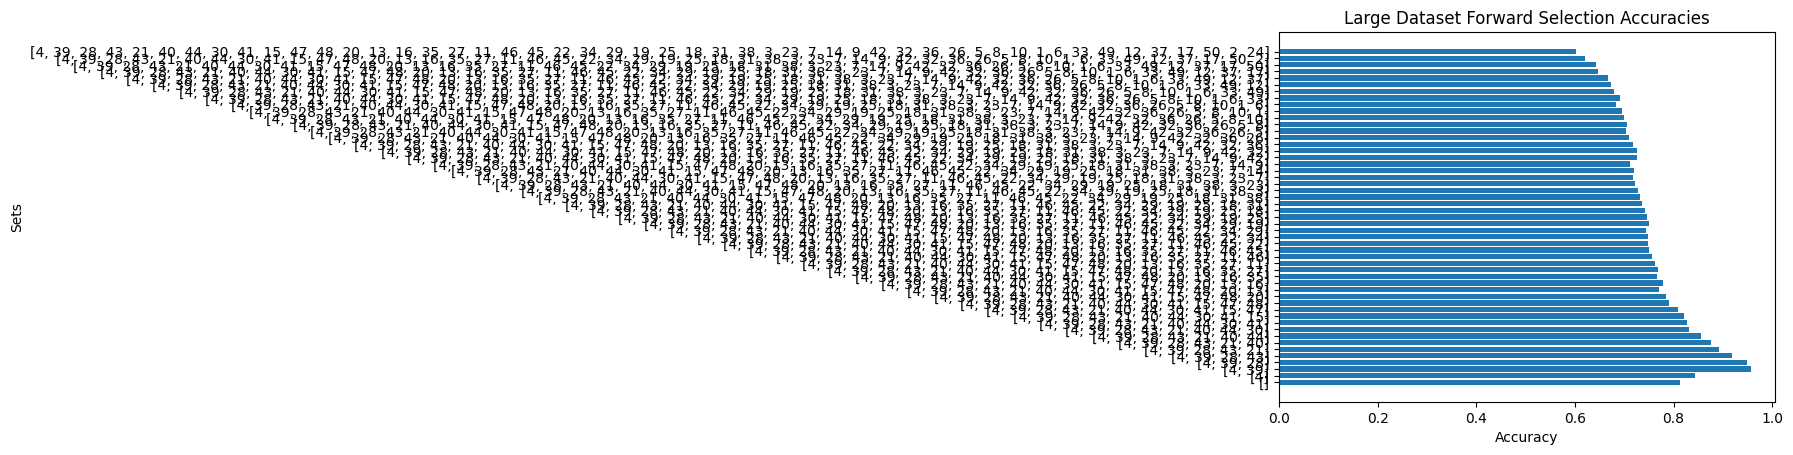

In [184]:
sets = ['[]']
prev = []
for feature in currentSelectionLF:
  prev.append(feature)
  sets.append(str(prev))

plt.barh(sets,[0.813] + accuraciesLF)
plt.title('Large Dataset Forward Selection Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Sets')
plt.show()

In [145]:
print(currentSelectionLF)
print(accuraciesLF)

[4, 39, 28, 43, 21, 40, 44, 30, 41, 15, 47, 48, 20, 13, 16, 35, 27, 11, 46, 45, 22, 34, 29, 19, 25, 18, 31, 38, 3, 23, 7, 14, 9, 42, 32, 36, 26, 5, 8, 10, 1, 6, 33, 49, 12, 37, 17, 50, 2, 24]
[0.843, 0.958, 0.949, 0.918, 0.892, 0.877, 0.855, 0.831, 0.828, 0.822, 0.81, 0.79, 0.785, 0.77, 0.779, 0.766, 0.769, 0.763, 0.756, 0.75, 0.748, 0.748, 0.745, 0.751, 0.746, 0.743, 0.736, 0.733, 0.727, 0.721, 0.718, 0.719, 0.712, 0.725, 0.725, 0.717, 0.709, 0.703, 0.706, 0.699, 0.696, 0.684, 0.692, 0.679, 0.674, 0.667, 0.647, 0.643, 0.62, 0.602]


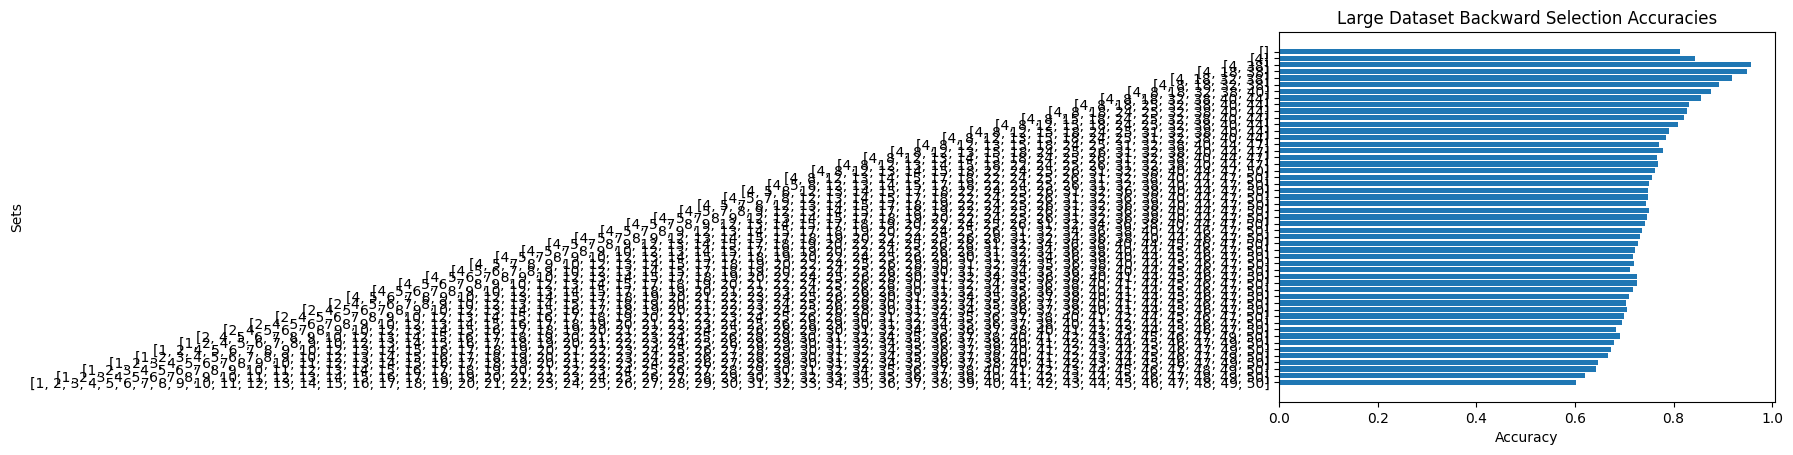

In [186]:
sets = []
prev = list(dfLarge.columns[1:])
sets.append(str(prev))
for feature in removeOrderLB:
  prev.remove(feature)
  sets.append(str(prev))

accuraciesLFTemp = [0.813] + accuraciesLF
accuraciesLFTemp.reverse()
plt.barh(sets, accuraciesLFTemp)
plt.title('Large Dataset Backward Selection Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Sets')
plt.show()

In [147]:
print(removeOrderLB)
print(accuraciesLF)

[39, 33, 48, 11, 3, 27, 1, 49, 43, 29, 42, 16, 2, 37, 23, 21, 41, 6, 35, 30, 10, 45, 28, 46, 34, 20, 9, 19, 7, 36, 5, 17, 50, 22, 14, 26, 47, 13, 31, 12, 15, 24, 25, 44, 40, 8, 32, 18, 38, 4]
[0.843, 0.958, 0.949, 0.918, 0.892, 0.877, 0.855, 0.831, 0.828, 0.822, 0.81, 0.79, 0.785, 0.77, 0.779, 0.766, 0.769, 0.763, 0.756, 0.75, 0.748, 0.748, 0.745, 0.751, 0.746, 0.743, 0.736, 0.733, 0.727, 0.721, 0.718, 0.719, 0.712, 0.725, 0.725, 0.717, 0.709, 0.703, 0.706, 0.699, 0.696, 0.684, 0.692, 0.679, 0.674, 0.667, 0.647, 0.643, 0.62, 0.602]


In [148]:
from ucimlrepo import fetch_ucirepo
#https://archive.ics.uci.edu/dataset/94/spambase

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

dfSpam = pd.concat([y, X], axis = 1).iloc[:, :20]

In [149]:
spamColumns = dfSpam.columns
print(spamColumns)

Index(['Class', 'word_freq_make', 'word_freq_address', 'word_freq_all',
       'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you'],
      dtype='object')


In [150]:
dfSpam.columns = range(len(dfSpam.columns))

In [151]:
dfSpam

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47
2,1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36
3,1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18
4,1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62
4597,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00
4598,0,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50
4599,0,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93


In [152]:
currentSelectionSpam, accuraciesSpam = forwardSelection(dfSpam, dfSpam.columns[1:])

Highest accuracy is 0.4227341882199522
   Obtained by adding 12
   Our current selection is now [12]
Highest accuracy is 0.5533579656596392
   Obtained by adding 19
   Our current selection is now [12, 19]
Highest accuracy is 0.6074766355140186
   Obtained by adding 3
   Our current selection is now [12, 19, 3]
Highest accuracy is 0.6418169963051511
   Obtained by adding 7
   Our current selection is now [12, 19, 3, 7]
Highest accuracy is 0.6678982829819604
   Obtained by adding 16
   Our current selection is now [12, 19, 3, 7, 16]
Highest accuracy is 0.683329710932406
   Obtained by adding 2
   Our current selection is now [12, 19, 3, 7, 16, 2]
Highest accuracy is 0.6955009780482504
   Obtained by adding 10
   Our current selection is now [12, 19, 3, 7, 16, 2, 10]
Highest accuracy is 0.7081069332753749
   Obtained by adding 5
   Our current selection is now [12, 19, 3, 7, 16, 2, 10, 5]
Highest accuracy is 0.7207128885024995
   Obtained by adding 6
   Our current selection is now [12, 

In [153]:
1 - nearestneighborAccuracy(dfSpam,[]) #baseline accuracy

0.6059552271245381

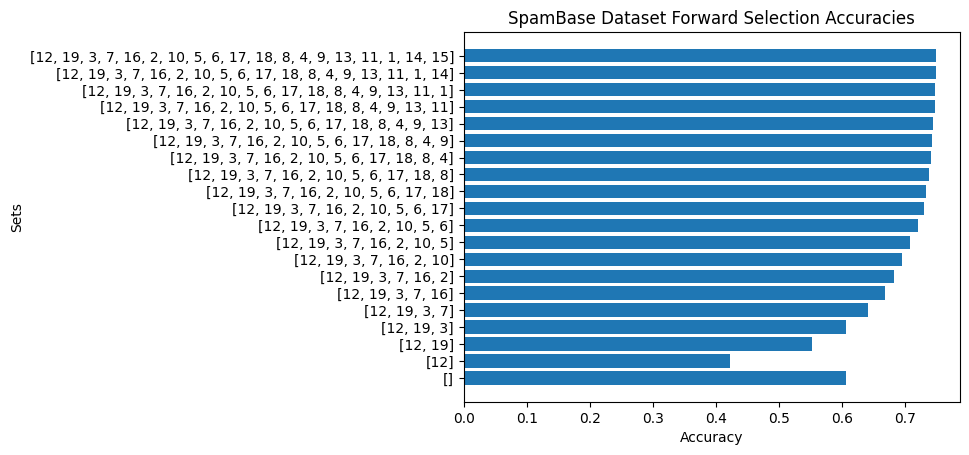

In [154]:
sets = ['[]']
prev = []
for feature in currentSelectionSpam:
  prev.append(feature)
  sets.append(str(prev))

plt.barh(sets, [0.6059552271245381] + accuraciesSpam)
plt.title('SpamBase Dataset Forward Selection Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Sets')
plt.show()